In [3]:
!pip install qiskit

[0.70710678 0.         0.70710678]


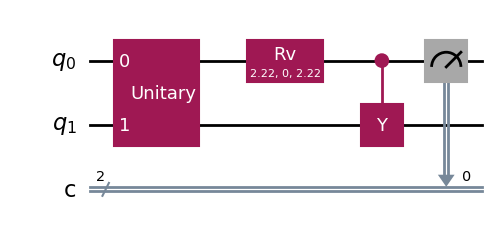

In [95]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.circuit.library import UnitaryGate
import numpy as np
import math

rotation_vector = np.array([1,0,1])
rotation_vector = rotation_vector / np.sqrt((rotation_vector.dot(rotation_vector)))
print(rotation_vector)
magnitude = math.pi
rotation_vector = rotation_vector * magnitude
 
matrix = [[1, 0, 0, 0],
          [0, 1, 0, 0],
          [0, 0, 0, 1],
          [0, 0, 1, 0]]

gate = UnitaryGate(matrix)
 
circuit = QuantumCircuit(2,2)

# circuit.h(0)

circuit.append(gate, [0, 1])

circuit.rv(*rotation_vector,0)

circuit.cy(0,1)

# circuit.measure_all()
circuit.measure(0,0)

circuit.draw("mpl")



In [96]:
from qiskit_aer import AerSimulator

# Transpile for simulator
simulator = AerSimulator()
circuit = transpile(circuit, simulator)

{'00': 508.69, '01': 515.31, '10': 0.0, '11': 0.0}


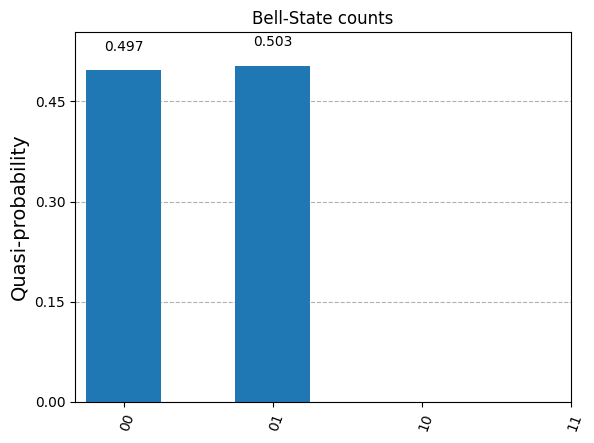

In [97]:
# Run and get counts
c00 = 0
c10 = 0
c01 = 0
c11 = 0
n=100
for _ in range(n):
    result = simulator.run(circuit).result()
    counts = result.get_counts(circuit)
    try:
        c00+=counts['00']
    except KeyError: pass
    try:
        c10+=counts ['10']
    except KeyError: pass
    try:
        c01+=counts['01']
    except KeyError: pass
    try:
        c11+=counts ['11']
    except KeyError: pass

counts = {"00":c00/n, "01":c01/n, "10":c10/n, "11":c11/n}
print(counts)
plot_histogram(counts, title='Bell-State counts')